In [2]:
from IPython.display import Image
%matplotlib inline

In [3]:
import pandas as pd
from io import StringIO
import sys

#讀取excel資料檔
df = pd.read_excel("AirQualityUCI.xlsx")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [4]:
#檢查缺失值或遺漏值
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [5]:
#1.處理missing data
#原本資料的缺失值就有-200了，為沒有偵測到的意思，這邊將其改為0
#將所有的-200替換為0
df.replace(-200, 0, inplace=True)
print(df)

           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25         0  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50         0  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00         0  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50         0   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75         0  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1        

In [6]:
#2.每個特徵與Label的敘述統計
#使用describe()方法計算描述統計信息(包括平均數、中位數、標準差、最小值、最大值)
statistics = df.describe()

#打印结果
print(statistics)

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      1.765545  1056.692672    21.373731     9.688596     902.298983   
std       1.554264   301.232260    91.103489     7.559609     318.681183   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.600000   921.000000     0.000000     4.004958     711.000000   
50%       1.500000  1052.500000     0.000000     7.886653     894.500000   
75%       2.600000  1221.250000     0.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    203.636796    802.695353    93.232617   1399.186287   982.774554   
std     214.984126    299.341439    61.468588    441.442059   438.060087   
min       0

In [7]:
#3.類別特徵轉換
#定義一個函數，根據數值傳回對應的編碼
def map_CO_GT(value):
    if value <= 4:
        return 0
    elif value <= 8:
        return 1
    elif value <= 12:
        return 2
    else:
        return value #如果超出了指定範圍，則保持原始值不變

#使用apply()方法將CO(GT)列根據映射函數進行編碼，並儲存在新的列 'CO(GT)_code' 中
df['CO(GT)_code'] = df['CO(GT)'].apply(map_CO_GT)

#列印CO(GT)列的前30行編碼值
print(df['CO(GT)_code'].head(30))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    1
26    1
27    0
28    0
29    0
Name: CO(GT)_code, dtype: int64


In [8]:
#找出濃度為1、2的行的CO(GT)列
CO_GT_1 = df.loc[df['CO(GT)_code'] == 1, 'CO(GT)']
CO_GT_2 = df.loc[df['CO(GT)_code'] == 2, 'CO(GT)']

#使用先前定義的函數將CO(GT)列的值根據編碼標準顯示為對應的濃度等級
CO_GT_1_mapped = CO_GT_1.map(map_CO_GT)
CO_GT_2_mapped = CO_GT_2.map(map_CO_GT)

#列印CO(GT)列濃度為1和2的行，依編碼標準顯示濃度等級
print(CO_GT_1_mapped)
print(CO_GT_2_mapped)

24      1
25      1
26      1
38      1
50      1
       ..
9206    1
9207    1
9241    1
9254    1
9350    1
Name: CO(GT), Length: 782, dtype: int64
111     2
5424    2
5496    2
5519    2
5520    2
5690    2
5736    2
5759    2
6048    2
6097    2
6098    2
6192    2
6193    2
6194    2
6195    2
6218    2
6264    2
6267    2
6409    2
6672    2
6696    2
6745    2
6746    2
6747    2
6912    2
6913    2
6914    2
7512    2
7513    2
8090    2
Name: CO(GT), dtype: int64


In [9]:
#4.訓練與測試split data
from sklearn.model_selection import train_test_split
import pandas as pd  

# 讀取文件
df_air_quality = pd.read_excel('AirQualityUCI.xlsx') 

# 刪除"Date"和"Time"欄位
df_air_quality.drop(columns=['Date', 'Time'], inplace=True)

# 使用train_test_split函數將數據集分割為訓練集和測試集
x, y = df_air_quality.iloc[:, 1:].values, df_air_quality.iloc[:, 0].values  
#x包含了從資料中的第二列到最後一列的所有特徵數據，y包含了資料中的第一列的目標數據

x_train, x_test, y_train, y_test =\
    train_test_split(x, y,  
                     test_size=0.2,  # 測試集大小為整個數據集的20%
                     random_state=0,  # 隨機種子設置為0，確保結果的可重現性
                     stratify=None)  # 不再進行分層抽樣

In [10]:
#5.特徵縮放
from sklearn.preprocessing import MinMaxScaler#導入 MinMaxScaler，用於最小-最大標準化

mms = MinMaxScaler()

#使用 fit_transform 方法對訓練集進行標準化，將其縮放到指定的範圍（默認是[0, 1]）
x_train_norm = mms.fit_transform(x_train)
#使用 transform 方法對測試集進行標準化，使用與訓練集相同的縮放因子
x_test_norm = mms.transform(x_test)

In [11]:
from sklearn.preprocessing import StandardScaler#導入 StandardScaler，用於標準化

stdsc = StandardScaler()
#使用 fit_transform 方法對訓練集進行標準化，將其轉換為平均值為0，標準差為1的分佈
x_train_std = stdsc.fit_transform(x_train)
#使用 transform 方法對測試集進行標準化，使用與訓練集相同的平均值和標準差進行轉換
x_test_std = stdsc.transform(x_test)

In [12]:
# 定義類別標籤編碼函數
def map_concentration(value):
    if value <= 4:
        return 0
    elif value <= 8:
        return 1
    elif value <= 12:
        return 2
    else:
        return value  # 如果超出指定範圍，保持原始值不變

# 對指定的特徵進行類別標籤編碼
features_to_encode = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                      'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
                      'T', 'RH', 'AH']

for feature in features_to_encode:
    df[feature + '_code'] = df[feature].apply(map_concentration)

# 新增CO(GT)分級欄位
df['CO(GT)_category'] = df['CO(GT)_code'].apply(lambda x: '0' if x == 0 else ('1' if x == 1 else '2'))

# 刪除原始特徵欄位和分級完的 code 欄位
df.drop(columns=[feat + '_code' for feat in features_to_encode], inplace=True)

# 打印前幾行以檢查
print(df.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH CO(GT)_category  
0  13.60  48.875001  0.757754               0  
1  13.30  47.700000 

In [13]:
# 印出 DataFrame 的所有欄位名稱
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'CO(GT)_category'],
      dtype='object')


In [14]:
# 刪除時間相關的欄位
df.drop(columns=['Date', 'Time'], inplace=True)
# 檢查修改後的 DataFrame
print(df.head())

   CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6      1360.00       150  11.881723        1045.50    166.0   
1     2.0      1292.25       112   9.397165         954.75    103.0   
2     2.2      1402.00        88   8.997817         939.25    131.0   
3     2.2      1375.50        80   9.228796         948.25    172.0   
4     1.6      1272.25        51   6.518224         835.50    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T         RH  \
0       1056.25    113.0       1692.00      1267.50  13.60  48.875001   
1       1173.75     92.0       1558.75       972.25  13.30  47.700000   
2       1140.00    114.0       1554.50      1074.00  11.90  53.975000   
3       1092.00    122.0       1583.75      1203.25  11.00  60.000000   
4       1205.00    116.0       1490.00      1110.00  11.15  59.575001   

         AH CO(GT)_category  
0  0.757754               0  
1  0.725487               0  
2  0.750239               0  
3  0.786713   

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20320 (\N{CJK UNIFIED IDEOGRAPH-4F60}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


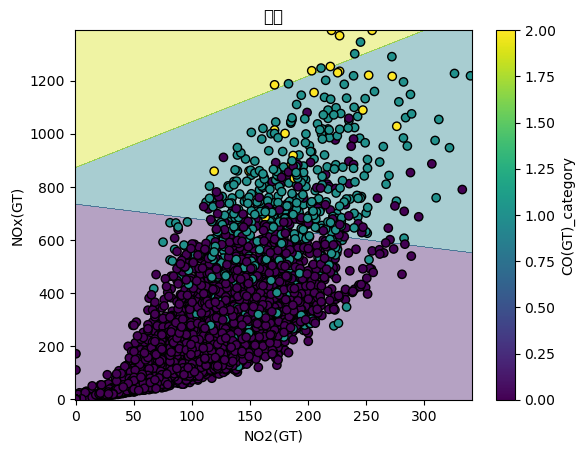

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# 選擇特徵
X = df[['NO2(GT)', 'NOx(GT)']]
y = df['CO(GT)_category']

# 將數據分為訓練集和測試集 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 初始化 Logistic Regression 模型
model = LogisticRegression()
# 訓練模型
model.fit(X_train, y_train)

# 繪製決策邊界圖
def plot_decision_boundary(model, X, y):
    # 將類別標籤轉換為數字
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # 確定特徵的最小值和最大值，以便設置繪圖範圍
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    
    # 產生網格點
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    # 用模型進行預測
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    # 繪製決策邊界
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='viridis')
    
    # 繪製訓練數據點
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_encoded, marker='o', edgecolor='black', cmap='viridis')

    plt.xlabel('NO2(GT)')
    plt.ylabel('NOx(GT)')
    plt.title('你好')
    plt.colorbar(label='CO(GT)_category')
    plt.show()

# 繪製決策邊界圖
plot_decision_boundary(model, X_train, y_train)